||
|:--------------------------------------------------------------------------:|
|<h1>Modelisation et evaluation des performances systemes</h1>|
|<h3>University UHB-Chlef - Master 1 informatique </h3>|
|<h4>Dr Ibri sarah and Slimane Mohamed</h4>|
</center>

## Introduction
Ce notebook est une introduction avec le python aux technique de la modelisation et la simulation des phenomenes stochastiques en utilisant les modules et librairies implementant les concepts clés de la theorie de probabilités et des processus stochastiques.

In [17]:
from fractions import Fraction
from functools import partial
import numpy as np

In [7]:
re_Xxx_Omega01 = {1,2,3,4,5,6}     ;print("Univers Omega : ", re_Xxx_Omega01)   #univers Omega
ev_A = {2,5}                       ;print("Event A : ", ev_A)                   #event A
ev_B = {3,4,5}                     ;print("Event B : ",ev_B)                    #event B  #C = A | B                print(C)
estDans = ev_A < re_Xxx_Omega01    ;print("Is subset A from Omega : ", estDans) # is subset
ev_Abar = re_Xxx_Omega01 - ev_A    ;print("Event complement of A : ", ev_Abar)  #complement

Univers Omega :  {1, 2, 3, 4, 5, 6}
Event A :  {2, 5}
Event B :  {3, 4, 5}
Is subset A from Omega :  True
Event complement of A :  {1, 3, 4, 6}


### Probabilité
- Soit $\Omega$ <b>univers fini</b> dont les elements sont <b>equiprobables</b> et $A$ un <b>evenement</b>, la <b>probabilité</b> de $A$ est :
$$P(A) = \frac{|A|}{|\Omega|}$$

In [1]:
#"The probability of an event, given a finite sample space of equiprobable outcomes."
Pde = lambda Omega : { omega:Fraction(1,len(Omega)) for omega in Omega }         #distribution
Pe  = lambda Omega, Event : (0,Fraction(len(Event), len(Omega)))[Event < Omega]  #probabilité equo

In [9]:
Pe_Xxx_01 = partial(Pe,re_Xxx_Omega01)
pe_A = Pe_Xxx_01(ev_A);  print(pe_A)

Pde_Xxx_01 = Pde(re_Xxx_Omega01)
print(Pde_Xxx_01)

1/3
{1: Fraction(1, 6), 2: Fraction(1, 6), 3: Fraction(1, 6), 4: Fraction(1, 6), 5: Fraction(1, 6), 6: Fraction(1, 6)}


In [14]:
#isProbability
isPositive    = lambda distribution : all(v >= 0 for v in distribution.values())
isNormed      = lambda distribution : sum(distribution.values()) == 1
isProbability = lambda distribution : isPositive(distribution) and isNormed(distribution)

In [15]:
#example
Pd1_Xxx_01 = {1: Fraction(2, 6), 
              2: Fraction(1, 12), 
              3: Fraction(1, 12), 
              4: Fraction(1, 6), 
              5: Fraction(1, 6), 
              6: Fraction(1, 6)}
print(Pd1_Xxx_01)
isProbability(Pd1_Xxx_01)

#### Exercice 01 :
Ecrire un code qui verifie si un dictionnaire est une probabilité?

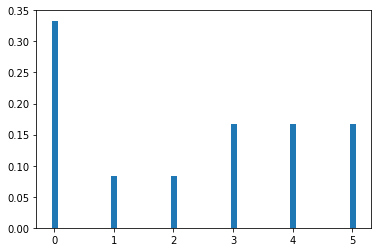

In [19]:
import matplotlib.pyplot as plt

def plotDistribution(pDist):
    mData = pDist.values()            #print(mData)[1/6 for i in Pd1_Xxx_01.values()]
    xData = np.arange(len(mData))     #;print(xData)
    xLabels = pDist.keys()            #;print(xLabels)

    width, dx = 0.1, 0.01             #  the width of the bars  #dx =0.02 #width/16
    plt.bar(xData + dx, mData, width) #, color='SkyBlue', label='Men')
    #plt.xticks(ind, xLabels)
    plt.show()
    
plotDistribution(Pd1_Xxx_01)

#### Combinatoric probability


|                 | Order yes | Order Non|
|-----------------|----------------------------------------|---|
| <b>Repetition yes</b> | List $$L_n^k = n^k$$   |  Arrangement/Permunation $$A_n^k = \frac{n!}{(n-k)!} \text{       } (P_n = A_n^n = n!)$$  |
| <b>Repetition non</b> | Combination $$C_n^k = \binom{k}{n} = \frac{n!}{k!(n-k)!}$$ | Combination with replacement $$R_n^k = \binom{(n-1)+k}{n-1} = \binom{n+k-1}{k} = \frac{(n+k-1)!}{k!(n-1)!} $$ |









$$L_n^k = n^k$$

$$A_n^k = \frac{n!}{(n-k)!} \text{       } (P_n = A_n^n = n!)$$

$$C_n^k = \binom{k}{n} = \frac{n!}{k!(n-k)!}$$

$$R_n^k = \binom{(n-1)+k}{n-1} = \binom{n+k-1}{k} = \frac{(n+k-1)!}{k!(n-1)!} $$



In [21]:
import itertools as it
import math   #Fac = math.factorial   

h  = lambda  st, nb : set( it.islice(st, nb))
hs = lambda  st, nb : list(it.islice(st, nb))
hd = lambda dic, nb : dict(it.islice(dic, nb))

P_n   = Fac = math.factorial                             ;print(Fac(5))         #permutations number
A_n_k = lambda n , k : int(Fac(n)/Fac(n-k))              ;print(A_n_k(5,2))     #arrangements number
C_n_k = lambda n , k : int(Fac(n)/(Fac(k)*Fac(n-k)))     ;print(C_n_k(5,2))     #combinations number
R_n_k = lambda n , k : int(Fac(n+k-1)/(Fac(k)*Fac(n-1))) ;print(R_n_k(5,2))     #combinations with replacement number

itComb = it.combinations
itPerm = lambda itrator :  it.permutations(itrator)
itArr  = it.permutations
itCrpl = it.combinations_with_replacement
itProd = it.product

120
20
10
15


In [24]:
#combination, permutation/arrangement,   #set(it.count(10)) #set(it.chain('ABC', 'DEF'))

#combination
r001= set(itComb({1,2,3,4,5}, 2)) ;print("r001 : ",r001)   ;print(len(r001), " ", C_n_k(5,2))
r002= list(itComb('ABCD', 2))     ;print("r002 : ",r002)   ;print(len(r002), " ", C_n_k(4,2))
r003= set(itComb(range(4), 3))    ;print("r003 : ",r003)   ;print(len(r003), " ", C_n_k(4,3))

r001 :  {(1, 2), (1, 3), (4, 5), (1, 4), (1, 5), (2, 3), (2, 5), (3, 4), (2, 4), (3, 5)}
10   10
r002 :  [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]
6   6
r003 :  {(0, 1, 2), (0, 2, 3), (1, 2, 3), (0, 1, 3)}
4   4


In [28]:
#permutations & arrangement
r004= set(itPerm([1, 2, 3]))      ;print("r004 : ",r004)   ;print(len(r004),"  ",P_n(3))
r005= set(itArr([1, 2, 3, 4], 2)) ;print("r005 : ",r005)   ;print(len(r005),"  ",A_n_k(4,2))

r004 :  {(3, 1, 2), (1, 3, 2), (3, 2, 1), (2, 3, 1), (1, 2, 3), (2, 1, 3)}
6    6
r005 :  {(1, 2), (3, 2), (1, 3), (4, 1), (3, 1), (2, 1), (1, 4), (2, 3), (4, 3), (4, 2), (3, 4), (2, 4)}
12    12


In [26]:
#combination with replacement
r006= set(itCrpl({1,2,3,4,5}, 2)) ;print("r006 : ",r006)  ;print(len(r006), " ", R_n_k(5,2))
r007= set(itCrpl('ABC', 2))       ;print("r007 : ",r007)  ;print(len(r007), " ", R_n_k(3,2))

r006 :  {(1, 2), (1, 3), (3, 3), (5, 5), (4, 5), (4, 4), (1, 4), (1, 5), (2, 4), (2, 3), (2, 2), (2, 5), (3, 4), (1, 1), (3, 5)}
15   15
r007 :  {('A', 'A'), ('C', 'C'), ('A', 'B'), ('B', 'B'), ('B', 'C'), ('A', 'C')}
6   6


In [27]:
r008= set(itComb('ABCDEFGH', 2))  ;print("r008 : ",r008)  ;print(len(r008), " ", C_n_k(8,2))
r009= set(itComb('IJKLMN', 2))    ;print("r009 : ",r009)  ;print(len(r009), " ", C_n_k(6,2))
r010= set(itComb('OPQR', 2))      ;print("r010 : ",r010)  ;print(len(r010), " ", C_n_k(4,2))
r011= set(itComb('ST', 2))        ;print("r011 : ",r011)  ;print(len(r011), " ", C_n_k(2,2))

r008 :  {('C', 'H'), ('E', 'H'), ('E', 'F'), ('A', 'B'), ('E', 'G'), ('A', 'E'), ('A', 'F'), ('D', 'H'), ('D', 'F'), ('D', 'E'), ('C', 'G'), ('C', 'E'), ('G', 'H'), ('B', 'C'), ('A', 'D'), ('B', 'D'), ('A', 'C'), ('B', 'G'), ('C', 'D'), ('B', 'H'), ('B', 'F'), ('F', 'G'), ('B', 'E'), ('A', 'H'), ('C', 'F'), ('F', 'H'), ('D', 'G'), ('A', 'G')}
28   28
r009 :  {('K', 'M'), ('M', 'N'), ('J', 'L'), ('I', 'N'), ('K', 'L'), ('I', 'M'), ('J', 'M'), ('J', 'K'), ('I', 'J'), ('I', 'K'), ('L', 'N'), ('K', 'N'), ('J', 'N'), ('I', 'L'), ('L', 'M')}
15   15
r010 :  {('O', 'R'), ('P', 'R'), ('P', 'Q'), ('O', 'P'), ('O', 'Q'), ('Q', 'R')}
6   6
r011 :  {('S', 'T')}
1   1


In [14]:
r012 =  set(itProd(r008, r009, r010, r011))
print(h(r012, 3),'    ',len(r012), '   ',C_n_k(8,2)*C_n_k(6,2)*C_n_k(4,2) )

In [3]:
#product
r007 = set(itProd({'F','P'}, range(1,6))); print(r007)

NameError: name 'itProd' is not defined

In [2]:
r001= set(itComb({'E1','E2','S1','S2','I1', 'I2', 'A1','A2'}, 2)) ;print("r001 : ",r001)   ;print(len(r001), " ", C_n_k(8,2))
r002= set(itComb({'Q11','Q12','Q21', 'Q22', 'Q31','Q32'}, 2)) ;print("r002 : ",r002)   ;print(len(r002), " ", C_n_k(6,2))
r003= set(itComb({'P11','P12','P21', 'P22'}, 2)) ;print("r003 : ",r003)   ;print(len(r003), " ", C_n_k(4,2))
r004= set(itComb({'N11','N12'}, 2)) ;print("r004 : ",r004)   ;print(len(r004), " ", C_n_k(2,2))

r000 =  set(itProd(r001, r002, r003, r004))    ; print(h(r000,4),'   ', len(r000),'    ', C_n_k(8,2)*C_n_k(6,2)*C_n_k(4,2)*C_n_k(2,2))

NameError: name 'itComb' is not defined

In [31]:
p1 =  (('S2', 'E1'), ('E1', 'S1'))
def vld(pp):
    S = set({})
    for i in pp:
        #print(i)
        if i[0]==i[1]:
            return ()
        if i[0] in S or i[1] in S:
            return ()
        S.add(i[0])
        S.add(i[1])
        #print(S)
    return pp
vld(p1) != ()

#st = (('S2', 'S2'), ('S2', 'E2'), ('E1', 'E2'), ('E1', 'S1'))
#vld(st)

M = {'E1','E2','S1','S2'}  #,'G1','G2','I1','I2'}
dd = set(itComb(M,2))                      #print(dd,'  ', C_n_k(4,2))  #print(h(dd,50))
pp =   set(itComb(dd,2))                   #print(pp,'  ', len(pp),'  ', C_n_k(C_n_k(4,2),2))
qq = [ i for i in pp if vld(i) != ()]      #print(qq,'    ', len(qq),'    ', C_n_k(4,2))

In [171]:
#product
r007 = set(itProd('W', range(1,6))); print(r007)

{('W', 1), ('W', 2), ('W', 3), ('W', 4), ('W', 5)}


# Example
give the model and its code for the following problem :<br>
An urn contains 23 balls: 8 white, 6 blue, and 9 red. <br>
We select 6 balls at random (each possible selection is equally likely). <br>
What is the probability of each of these possible outcomes:

In [172]:
#to model this problem we will use the following conventions : W for white, B for blue, R for red 
g = lambda c, n : set(itProd(c, range(n)))   #model n numbered balls 

urn_w = g('W',8)   # 8 white balls of the urn
urn_b = g('B',6)   # 6 blue balls of the urn
urn_r = g('R',9)   # 9 red balls of the urn

#the model of the urn
urn001 = urn_w | urn_b | urn_r           ;print(urn001)    ;print(len(urn001))

{('R', 0), ('B', 1), ('W', 1), ('R', 2), ('B', 3), ('W', 3), ('R', 4), ('R', 6), ('W', 4), ('B', 4), ('R', 8), ('W', 6), ('R', 1), ('W', 0), ('R', 3), ('B', 0), ('W', 2), ('R', 5), ('B', 2), ('R', 7), ('B', 5), ('W', 5), ('W', 7)}
23


In [176]:
#Random experiment : select 6 balls at random (each possible selection is equally likely).    #print(set(it.islice(omega01, 4)))

#probabilisable space (Omega, Tribu, Probability)  
re_001_Omega01 = set(itComb(urn001, 6)); print(h(re_001_Omega01, 4)) 
print(len(re_001_Omega01)," ", C_n_k(23,6))  #1- Omega = all possible results #tribu01 = ??????

#tribu01 = ??????
Pe_00101 = { omega:0.6 for omega in re_001_Omega01 }  #probability
ps00101 =  (re_001_Omega01, Pe_00101)

print(Pe_00101[(('R', 0), ('R', 2), ('B', 0), ('R', 7), ('B', 5), ('W', 7))])
print(hs(Pe_00101.keys(),3))
print(hs(Pe_00101.values(),3))

{(('R', 0), ('R', 2), ('B', 0), ('R', 7), ('B', 5), ('W', 7)), (('B', 3), ('W', 3), ('B', 4), ('R', 8), ('R', 1), ('W', 5)), (('W', 1), ('W', 4), ('W', 0), ('B', 0), ('B', 5), ('W', 7)), (('R', 2), ('W', 3), ('R', 6), ('W', 0), ('R', 3), ('W', 2))}
100947   100947
0.6
[(('W', 1), ('W', 4), ('W', 0), ('B', 0), ('B', 5), ('W', 7)), (('R', 0), ('R', 2), ('B', 0), ('R', 7), ('B', 5), ('W', 7)), (('R', 2), ('W', 3), ('R', 6), ('W', 0), ('R', 3), ('W', 2))]
[0.6, 0.6, 0.6]


In [181]:
#- A1 = all balls are red
ev_E1_6R = set(itComb(urn_r, 6))    ;print(h(urn_r, 4))  ;print(len(ev_E1_6R), "   ",C_n_k(9,6))

{('R', 0), ('R', 5), ('R', 3), ('R', 2)}
84     84


In [ ]:
#- A2 = 3 are blue, 2 are white, and 1 is red  principe de composition 
ev_E20_3B = set(itComb(urn_b, 3))   
print(h(urn_b, 4))      
c3B = C_n_k(6,3)  
print(len(ev_E20_3B), "   ",c3B)

ev_E21_2W = set(itComb(urn_w, 2))   ;print(h(urn_w, 4))      ;c2W = C_n_k(8,2)  ;print(len(ev_E21_2W), "   ",c2W)
ev_E22_1R = set(itComb(urn_r, 1))   ;print(h(urn_r, 4))      ;c1R = C_n_k(9,1)  ;print(len(ev_E22_1R), "   ",c1R)
ev_E2_3B2W1R = set(itProd(ev_E20_3B, ev_E21_2W, ev_E22_1R))  ;c3B2W1R = c3B*c2W*c1R ;print(h(ev_E2_3B2W1R, 4)) ;print(len(ev_E2_3B2W1R)," ",c3B2W1R)

print(Pe(re_001_Omega01, ev_E2_3B2W1R))
ev_E2_3B2W1R < re_001_Omega01

### Exercice 02 :
Ecrire le code du 3ieme evenement

In [202]:
#- A3 = exactly 4 balls are white
ev_E30_4W   = set(itComb(urn_w, 4))              
print(h(urn_w, 4))      
c4W = C_n_k(8,4)  
print(len(ev_E30_4W), "   ",c4W)

#
ev_E31_2BR  = set(itComb(urn_b | urn_r, 2))       
print(h(urn_b | urn_r, 4))      
c2BR = C_n_k(15,2)  
print(len(ev_E31_2BR), "   ",c2BR)

#
ev_E3_4W2BR = set(itProd(ev_E30_4W, ev_E31_2BR))  
c4W2BR = c4W*c2BR 
print(h(ev_E3_4W2BR, 4)) 
print(len(ev_E3_4W2BR)," ",c4W2BR)

{('W', 2), ('W', 0), ('W', 3), ('W', 1)}
70     70
{('R', 0), ('B', 1), ('R', 3), ('R', 1)}
105     105
{((('W', 0), ('W', 3), ('W', 5), ('W', 6)), (('R', 3), ('R', 4))), ((('W', 0), ('W', 1), ('W', 6), ('W', 7)), (('B', 1), ('R', 6))), ((('W', 0), ('W', 3), ('W', 6), ('W', 7)), (('R', 1), ('R', 3))), ((('W', 0), ('W', 3), ('W', 5), ('W', 7)), (('B', 2), ('R', 4)))}
7350   7350


In [233]:
# Listing L001 ( Abreviations  re : random experiment )
from sympy.stats import Coin , Die, density
 # stats : SymPy statistics module
 # Coin(name , p=1/2) : Create a Finite model representing a Coin toss.
 # density : Create a probability model

print('Random experiments sample space : ') #p0
#E1
re_Coin = Coin('re_Coin1')                           #re : toss coin
re_Coin_Omega = set(density(re_Coin).dict.keys())   #get sample space
print( "− E1 Toss a Coin Omega : " , re_Coin_Omega) #p1

Random experiments sample space : 
− E1 Toss a Coin Omega :  {H, T}


In [234]:
# Die(name , side s=6) : Create a Finite model representing a fair die.
#E2
re_Die = Die('re_Die1')                           #re : toss coin
re_Die_Omega = set(density(re_Die).dict.keys())   #get sample space
print( "− E2 Roll dice omega : " , re_Die_Omega) #p1

− E2 Roll dice omega :  {1, 2, 3, 4, 5, 6}


In [251]:
#E3
re_3Dices_Omega = set(it.product(re_Die_Omega , repeat=3))
print("− E3 drop 3 Dices Dmega : " , h(re_3Dices_Omega,4)) #p3
print("- Omega length : ", len(re_3Dices_Omega))
P_3Dices_Omega = Pde(re_3Dices_Omega)  #;print("- Probability App : ",P_3Dices_Omega)

− E3 drop 3 Dices Dmega :  {(1, 4, 4), (5, 5, 1), (4, 2, 2), (2, 2, 4)}
- Omega length :  216


In [277]:
#événement $E$ que 'le score du troisième dé est égal a la somme des scores des deux premiers
ev_Property = lambda omega : omega[0]+omega[1] == omega[2]  #f((1,2,3)) True
ev_Filter =  lambda evProperty , reOmega : set(filter(evProperty, reOmega))

ev_E = ev_Filter(ev_Property, re_3Dices_Omega) ;print("- E Length: ",len(ev_E))    
p_E = Pe(re_3Dices_Omega, ev_E)                ;print("- Probability of event E : ",p_E)

- E Length:  15
- Probability of event E :  5/72


In [318]:
re_2Coins_Omega = set(it.product(re_Coin_Omega , repeat=2))  
print("- Tosse 2 Coins Omega : ",re_2Coins_Omega)

P_2Coins_Omega = Pde(re_2Coins_Omega)                        
print("- Proba map : ",P_2Coins_Omega)   #from sympy import Symbol

ev_Property0 = lambda i, val, omega : omega[i] == val  
ev_E = ev_Filter(partial(ev_Property0,0, Symbol("T")) , re_2Coins_Omega) 
p_E = Pe(re_2Coins_Omega, ev_E)                                          
print("- Event E : ",ev_E, " Probability : ",p_E)

ev_F = ev_Filter(partial(ev_Property0,1, Symbol("T")) , re_2Coins_Omega) 
p_F = Pe(re_2Coins_Omega, ev_F)                                          
print("- Event F : ",ev_F, " Probabulity : ",p_F)

ev_EF = ev_E & ev_F
p_EF = Pe(re_2Coins_Omega, ev_EF)                                        
print("- Event E et F : ",ev_EF, " Probability : ", p_EF)

ev_K = ev_E | ev_F                                                       
p_K = p_E + p_F - p_EF                                                   
print("- Event K (E or F) : ", ev_K, " Probability : ", p_K)

- Tosse 2 Coins Omega :  {(T, H), (H, T), (H, H), (T, T)}
- Proba map :  {(T, H): Fraction(1, 4), (H, T): Fraction(1, 4), (H, H): Fraction(1, 4), (T, T): Fraction(1, 4)}
- Event E :  {(T, H), (T, T)}  Probability :  1/2
- Event F :  {(H, T), (T, T)}  Probabulity :  1/2
- Event E et F :  {(T, T)}  Probability :  1/4
- Event K (E or F) :  {(H, T), (T, H), (T, T)}  Probability :  3/4


In [ ]:
# n enfants non jumeaux 
# proba au moins deux enfants ont le meme jour d'anniversaire
# 365 jours/année et les jours sont equoprob
#RE result as drop n birthdays in order from 365 days
year = { d for d in range(365) }  # {d_1, d_2, ..., d_365}
#(b_1, b_2, ..., b_n)
n = 4
print(year)
re_Bdp_Omega = set(itProd(year, repeat=n))

In [102]:
from sympy.stats import given, density, Die
X = Die('X', 6)
Y = given(X, X > 3)
density(Y).dict     #{4: 1/3, 5: 1/3, 6: 1/3}

{4: 1/3, 5: 1/3, 6: 1/3}

In [72]:
X = Die('X', 6)
Y = X % 2
print(Y)

Y = given(X, X % 2 > 0)
density(Y).dict     #{4: 1/3, 5: 1/3, 6: 1/3}

Mod(X, 2)


{1: 1/3, 3: 1/3, 5: 1/3}

In [46]:
X = Die('X', 6) 
Y = X % 2
Y = given(X, X % 2 > 0)
density(Y).dict     #{4: 1/3, 5: 1/3, 6: 1/3}

{1: 1/3, 3: 1/3, 5: 1/3}

In [121]:
from sympy.stats import FiniteRV, density
R = {'r1','r2','r3','r4'}                   #R1 = {1,2,3,4}
B = { 'b1', 'b2', 'b3', 'b4', 'b5', 'b6'}   #B1 = {1,2,3,4,5,6}
U =  R | B                                  # rr:100    rb:200   br:300   bb:400

codage = {'rr':100,'rb':200, 'br':300, 'bb':400}      #Omega = set(itArr(U, 2)) #[ i[0]+ i[1]*10 for  i in itArr(U, 2)])

Omega = set([ codage[i[0][0]+i[1][0]]+ int(i[0][1])*10+int(i[1][1]) for  i in itArr(U, 2)])

print('Omega : ', h(Omega,8),'   Length :  ', len(Omega))

Omega :  {131, 132, 112, 113, 114, 121, 123, 124}    Length :   90


In [116]:
from sympy.stats import DiscreteUniform      # equally likely over a, b, c, #  distribution over a range
from sympy import symbols

X = DiscreteUniform('X', Omega)                     
Pdf = density(X).dict                          #print(X)

from sympy.logic.boolalg import And, Or, Not    #print(h(A,4))
from sympy.stats import P   #Y = symbol(X  - X % 100)

A = X < 301                                  ;print('P(A) = ',P(A))     # A First red 100 + 200
B = Or(X < 201, And(299 < X, X < 401))       ;print('P(B) = ',P(B))     # B Second red 100 + 200
AB = X < 201                                 ;print('P(AB) = ',P(AB))   # AB First and Second red 100 + 200
B_gv_A = given(B, A)                         ;print('P(B|A) = ', P(B_gv_A))          # B given A

Y = given(X, X < 301)                        # B given A
Pdf_Y = density(Y).dict 
print(Pdf_Y)
#print(P( And(199 < Y,Y < 300)))

from sympy.stats import rv
#rv.pspace(Y)

P(A) =  2/5
P(B) =  2/5
P(AB) =  2/15
P(B|A) =  1/3
{112: 1/36, 113: 1/36, 114: 1/36, 121: 1/36, 123: 1/36, 124: 1/36, 131: 1/36, 132: 1/36, 134: 1/36, 141: 1/36, 142: 1/36, 143: 1/36, 211: 1/36, 212: 1/36, 213: 1/36, 214: 1/36, 215: 1/36, 216: 1/36, 221: 1/36, 222: 1/36, 223: 1/36, 224: 1/36, 225: 1/36, 226: 1/36, 231: 1/36, 232: 1/36, 233: 1/36, 234: 1/36, 235: 1/36, 236: 1/36, 241: 1/36, 242: 1/36, 243: 1/36, 244: 1/36, 245: 1/36, 246: 1/36}


In [85]:
density0 = {0: .1, 1: .2, 2: .3, 3: .4}
X = FiniteRV('X', density0)
print(density(X).dict)                    #print(E(X),'      ',P(X >= 2))         #0.700000000000000

{0: 0.1, 1: 0.2, 2: 0.3, 3: 0.4}


In [4]:
# Listing L001 ( Abreviations  re : random experiment )
from sympy.stats import Coin , Die, density
 # stats : SymPy statistics module
 # Coin(name , p=1/2) : Create a Finite model representing a Coin toss.
 # density : Create a probability model

print('Random experiments sample space : ') #p0
#E1
re_Coin = Coin('re_Coin1')                           #re : toss coin
re_Coin_Omega = set(density(re_Coin).dict.keys())   #get sample space
print( "− E1 Toss a Coin Omega : " , re_Coin_Omega) #p1
print(density(re_Coin))

Random experiments sample space : 
− E1 Toss a Coin Omega :  {H, T}
BernoulliDistribution(1/2, H, T)


In [5]:
# Die(name , side s=6) : Create a Finite model representing a fair die.
#E2
re_Die = Die('re_Die1')                           #re : toss coin
re_Die_Omega = set(density(re_Die).dict.keys())   #get sample space
print( "− E2 Roll dice omega : " , re_Die_Omega) #p1

− E2 Roll dice omega :  {1, 2, 3, 4, 5, 6}


In [6]:
#E3
re_3Dices_Omega = set(it.product(re_Die_Omega , repeat=3))
print("− E3 drop 3 Dices Dmega : " , h(re_3Dices_Omega,4)) #p3
print("- Omega length : ", len(re_3Dices_Omega))
P_3Dices_Omega = Pde(re_3Dices_Omega)  #;print("- Probability App : ",P_3Dices_Omega)

NameError: name 'it' is not defined

In [7]:
#événement $E$ que 'le score du troisième dé est égal a la somme des scores des deux premiers
ev_Property = lambda omega : omega[0]+omega[1] == omega[2]  #f((1,2,3)) True
ev_Filter =  lambda evProperty , reOmega : set(filter(evProperty, reOmega))

ev_E = ev_Filter(ev_Property, re_3Dices_Omega) ;print("- E Length: ",len(ev_E))    
p_E = Pe(re_3Dices_Omega, ev_E)                ;print("- Probability of event E : ",p_E)

NameError: name 're_3Dices_Omega' is not defined

In [8]:
re_2Coins_Omega = set(it.product(re_Coin_Omega , repeat=2))  
print("- Tosse 2 Coins Omega : ",re_2Coins_Omega)

P_2Coins_Omega = Pde(re_2Coins_Omega)                        
print("- Proba map : ",P_2Coins_Omega)   #from sympy import Symbol

ev_Property0 = lambda i, val, omega : omega[i] == val  
ev_E = ev_Filter(partial(ev_Property0,0, Symbol("T")) , re_2Coins_Omega) 
p_E = Pe(re_2Coins_Omega, ev_E)                                          
print("- Event E : ",ev_E, " Probability : ",p_E)

ev_F = ev_Filter(partial(ev_Property0,1, Symbol("T")) , re_2Coins_Omega) 
p_F = Pe(re_2Coins_Omega, ev_F)                                          
print("- Event F : ",ev_F, " Probabulity : ",p_F)

ev_EF = ev_E & ev_F
p_EF = Pe(re_2Coins_Omega, ev_EF)                                        
print("- Event E et F : ",ev_EF, " Probability : ", p_EF)

ev_K = ev_E | ev_F                                                       
p_K = p_E + p_F - p_EF                                                   
print("- Event K (E or F) : ", ev_K, " Probability : ", p_K)

NameError: name 'it' is not defined

# Probabilité conditionelle
#### Probabilté conditionelle
$P(B) \neq 0$
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

$P_{|B}()$ est une probabilité

#### Probabilté composée
$$P(A_1 \cap A_2 \cap \cdots \cap A_n) = P(A_1)P(A_2|A_1)P(A_3|A_1 \cap A_2) \cdots 
P(A_3|A_1 \cap A_2 \cdots \cap A_{n-1} )$$

#### Probabilté totale
${E_i}_{i \in 1..n}$ est une partition de $\Omega$, et A un evenement :
$$
P(A) = P(A|E_1)P(E_1) + P(A|E_2)P(E_2) + \cdots + P(A|E_n)P(E_n)
$$


#### Formule de Bayes
$$
P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|A^c)P(A^c)}
$$

## Independance
${A_i}_{i \in 1..n}$

$$
P(\bigcap_{i=1}^n A_i ) = \prod_{i=1}^n P(A_i)  
$$

0.5072972343239857  	  0.7063162427192688  	  0.9031516114817354  	  0.9901224593411699


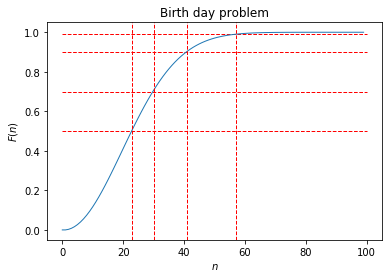

In [11]:
import numpy as np
from matplotlib import pyplot as plt   #from scipy.stats import cauchy

#F(n) = 1 - A_365^n / 365^n
F = lambda n : 1 - np.prod([(365-i)/365 for i in range(n)])
E = [F(i) for i in range(100)]   # F(i) i:1..100
print(F(23), ' \t ',F(30), ' \t ', F(41), ' \t ', F(57))

#n=100
plt.plot(range(100), E, linewidth=1)
xposition = [23, 30, 41, 57]
for xc in xposition: plt.axvline(x=xc, color ='red', linewidth=1, linestyle='--')

yposition = [0.5, 0.7, 0.9, 0.99]
for yc in yposition: plt.hlines(y=yc, xmin=0, xmax=100, linewidth=1, color='r', linestyle='--')

plt.xlabel('$n$')
plt.ylabel(r'$F(n)$')
plt.title('Birth day problem')    
plt.show()

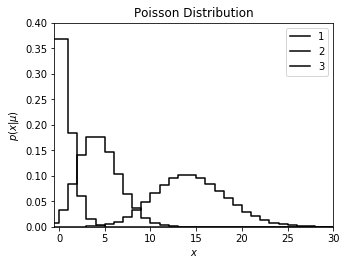

In [14]:
from sympy.stats import Poisson

#setup_text_plots(fontsize=8, usetex=True)
#------------------------------------------------------------
# Define the distribution parameters to be plotted
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']

fig, ax = plt.subplots(figsize=(5, 3.75))
x = np.arange(-20, 200)
    
for mu, ls in zip(mu_values, linestyles):
    dist = density(Poisson("P",mu))
    y = [dist(i) for i in x]
    plt.step(x, y, color='black', label=r'$\mu=%i$' % mu, linestyle='steps-mid')  #dist(x))
    

plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend("123")
plt.show()

In [13]:
x = np.arange(1, 10)
x
dist = density(Poisson("P",0.5))
[ dist(i) for i in x ]

[0.303265329856317,
 0.0758163324640792,
 0.0126360554106799,
 0.00157950692633498,
 0.000157950692633498,
 1.31625577194582e-5,
 9.40182694247014e-7,
 5.87614183904383e-8,
 3.26452324391324e-9]